# Creating Space-MOCs from shapes

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
from astropy.coordinates import SkyCoord
from mocpy import MOC

## Create a MOC from cone(s)

Single cone

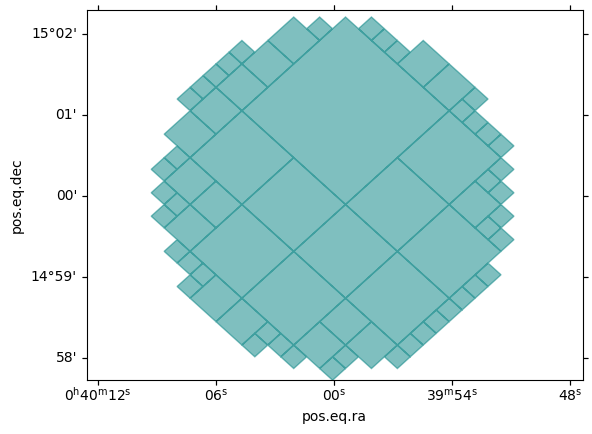

In [2]:
cone = MOC.from_cone(10 * u.deg, 15 * u.deg, radius=2 * u.arcmin, max_depth=14)

fig = plt.figure()
wcs = cone.wcs(fig)  # automatically creates a wcs for the MOC
ax = fig.add_subplot(projection=wcs)
cone.fill(ax, wcs, color="teal", alpha=0.5)

Multiple cones, same radius

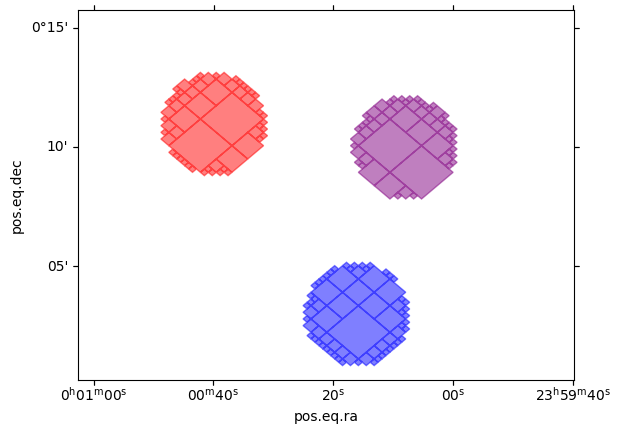

In [3]:
cones = MOC.from_cones(
    [10, 4, 2] * u.arcmin,
    [11, 3, 10] * u.arcmin,
    radius=2 * u.arcmin,
    max_depth=14,
)

fig = plt.figure()
wcs = sum(cones).wcs(fig)  # automatically creates a wcs for the union of the MOC
ax = fig.add_subplot(projection=wcs)
for cone, color in zip(cones, ["red", "blue", "purple"]):
    cone.fill(ax, wcs, color=color, alpha=0.5)

Multiple cones, different radii

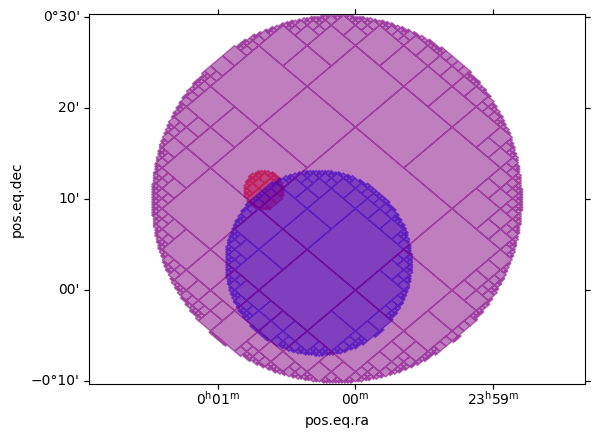

In [4]:
cones = MOC.from_cones(
    [10, 4, 2] * u.arcmin,
    [11, 3, 10] * u.arcmin,
    radius=[2, 10, 20] * u.arcmin,
    max_depth=14,
)
fig = plt.figure()
wcs = sum(cones).wcs(fig)  # automatically creates a wcs for the union of the MOC
ax = fig.add_subplot(projection=wcs)
for cone, color in zip(cones, ["red", "blue", "purple"]):
    cone.fill(ax, wcs, color=color, alpha=0.5)

## Create MOCs from polygon(s)

In [5]:
# Methods for defining random polygons


def generate_rand_polygon(num_points):
    """Generate a random polygon.

    Parameters
    ----------
        num_points : int
            number of random points to generate

    Returns
    -------
        (astropy.units.quantity.Quantity, astropy.units.quantity.Quantity)
            a tuple containing the longitutes and lattitudes of the random points
    """
    lon_min, lon_max = (-5, 5)
    lat_min, lat_max = (-5, 5)
    lon = (np.random.random(num_points) * (lon_max - lon_min) + lon_min) * u.deg
    lat = (np.random.random(num_points) * (lat_max - lat_min) + lat_min) * u.deg
    return lon, lat


def generate_concave_polygon(num_points, lon_offset, lat_offset):
    """Generate a concave polygon.

    Parameters
    ----------
    num_points : int
        the number of corners
    lon_offset : float
        offset in longitudinal direction
    lat_offset : float
        offset in latitudinal direction

    Returns
    -------
    (astropy.units.quantity.Quantity, astropy.units.quantity.Quantity)
        a tuple containing the longitutes and lattitudes of the random points
    """
    radius_max = 10

    angles = np.linspace(0, 2 * np.pi, num_points)
    radius = np.random.random(angles.shape[0]) * radius_max

    lon = (np.cos(angles) * radius + lon_offset) * u.deg
    lat = (np.sin(angles) * radius + lat_offset) * u.deg
    return lon, lat


def generate_convexe_polygon(num_points, lon_offset, lat_offset):
    """Generate the corners on a convexe polygon.

    Parameters
    ----------
    num_points : int
        the number of corners
    lon_offset : float
        offset in longitudinal direction
    lat_offset : float
        offset in latitudinal direction

    Returns
    -------
    (astropy.units.quantity.Quantity, astropy.units.quantity.Quantity)
        a tuple containing the longitutes and lattitudes of the random points
    """
    radius_max = 10

    angles = np.linspace(0, 2 * np.pi, num_points)
    radius = np.random.random() * radius_max * np.ones(angles.shape[0])

    lon = (np.cos(angles) * radius + lon_offset) * u.deg
    lat = (np.sin(angles) * radius + lat_offset) * u.deg
    return lon, lat

In [6]:
%%time
# Let's generate four MOCs


## Two random ones
lon, lat = generate_rand_polygon(12)
random_moc_1 = MOC.from_polygon(lon=lon, lat=lat, max_depth=12)

lon, lat = generate_rand_polygon(5)
random_moc_2 = MOC.from_polygon(lon=lon, lat=lat, max_depth=12)

## A convexe one
lon, lat = generate_convexe_polygon(15, 20, 7)
convexe_moc = MOC.from_polygon(lon=lon, lat=lat, max_depth=12)

## A concave one
lon, lat = generate_concave_polygon(15, 20, 7)
concave_moc = MOC.from_polygon(lon=lon, lat=lat, max_depth=12)

CPU times: user 23.1 ms, sys: 3.27 ms, total: 26.4 ms
Wall time: 26.4 ms


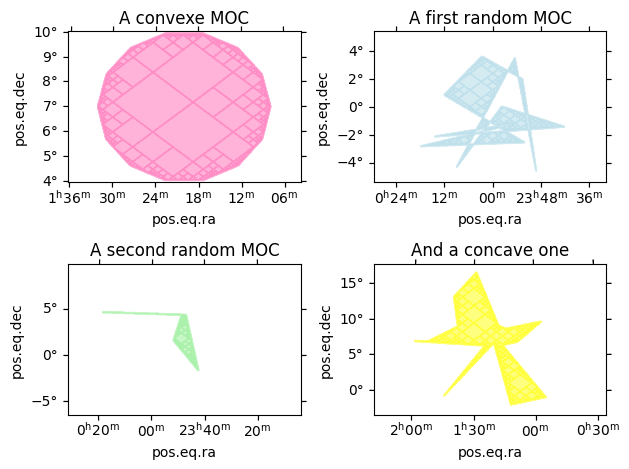

In [7]:
# Let's plot the results

fig = plt.figure()

wcs = convexe_moc.wcs(fig)  # automatically creates a wcs for the MOC
ax1 = fig.add_subplot(221, projection=wcs)  # The first of a 2*2 grig of subplots
convexe_moc.fill(
    ax1,
    wcs,
    color="hotpink",
    alpha=0.5,
)  # Where the MOC is added to the plot
ax1.set_title("A convexe MOC")  # Comments and titles

wcs = random_moc_1.wcs(fig)
ax2 = fig.add_subplot(222, projection=wcs)
random_moc_1.fill(ax2, wcs, color="lightblue", alpha=0.5)
ax2.set_title("A first random MOC")

wcs = random_moc_2.wcs(fig)
ax3 = fig.add_subplot(223, projection=wcs)
random_moc_2.fill(ax3, wcs, color="lightgreen", alpha=0.5)
ax3.set_title("A second random MOC")

wcs = concave_moc.wcs(fig)
ax4 = fig.add_subplot(224, projection=wcs)
concave_moc.fill(ax4, wcs, color="yellow", alpha=0.5)
ax4.set_title("And a concave one")

fig.tight_layout()  # prevents overlapping labels

To generate a lot of MOCs from a list of polygons, use the `from_polygons` method.

In [8]:
list_vertices = [
    SkyCoord([-4, 4, 4, -4], [4, 4, -4, -4], unit="deg"),
    SkyCoord([0, 6, 0, -6], [6, 0, -6, 0], unit="deg"),
]
list_mocs = MOC.from_polygons(list_vertices)

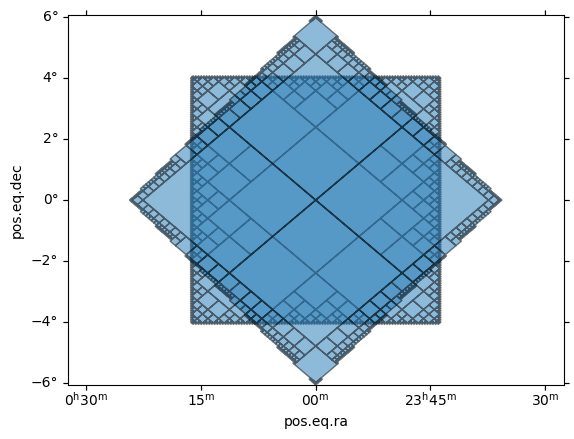

In [9]:
# Let's plot them
fig = plt.figure()
wcs = sum(list_mocs).wcs(fig)  # gets the WCS for the union of the mocs
ax = fig.add_subplot(projection=wcs)
for moc in list_mocs:
    moc.fill(ax, wcs, alpha=0.5)